**Data Collection**

In [ ]:
! kaggle datasets download elijahconnectng/airlines-review-dataset
! unzip airlines-review-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/elijahconnectng/airlines-review-dataset
License(s): apache-2.0
  0% 0.00/2.60M [00:00<?, ?B/s]
100% 2.60M/2.60M [00:00<00:00, 130MB/s]
Archive:  airlines-review-dataset.zip
  inflating: airlines_reviews.csv    


In [ ]:
# import necessary libraries
# pandas for dataset manipulation
# matplotlib.pyplot and seaborn for data visualization
# scipy.stats for statistical methods

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from statsmodels.formula.api import ols

**Data Preparation**

In [ ]:
df = pd.read_csv('airlines_reviews.csv')

# remove uncessary columns
df = df[df['Verified'] == "True"]
df = df.drop(["Title", "Name", "Review Date", "Verified", "Reviews", "Route", "Class", "Recommended"], axis=1)
df = df[~df['Airline'].isin(['All Nippon Airways', 'Japan Airlines', 'Korean Air', 'EVA Air'])]
df['Overall Rating'] = MinMaxScaler(feature_range=(1, 5)).fit_transform(df[['Overall Rating']])
df.head()


,Airline,Type of Traveller,Month Flown,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating
0,Singapore Airlines,Solo Leisure,December 2023,4,4,4,4,4,4.555556
1,Singapore Airlines,Solo Leisure,February 2024,5,3,4,4,1,1.888889
2,Singapore Airlines,Family Leisure,February 2024,1,5,2,1,5,5.000000
3,Singapore Airlines,Solo Leisure,February 2024,5,5,5,5,5,5.000000
4,Singapore Airlines,Family Leisure,February 2024,5,5,5,5,5,5.000000


In [ ]:
print(df.isnull().sum())
print(df.describe())
print(df["Airline"].unique())
df.to_excel('cleaned_airline_dataset.xlsx', index=False)

Airline                   0
Type of Traveller         0
Month Flown               0
Seat Comfort              0
Staff Service             0
Food & Beverages          0
Inflight Entertainment    0
Value For Money           0
Overall Rating            0
dtype: int64
       Seat Comfort  Staff Service  Food & Beverages  Inflight Entertainment  \
count   5507.000000    5507.000000       5507.000000             5507.000000   
mean       3.336118       3.486290          3.308516                3.632468   
std        1.409251       1.543751          1.466841                1.323467   
min        1.000000       1.000000          1.000000                1.000000   
25%        2.000000       2.000000          2.000000                3.000000   
50%        4.000000       4.000000          4.000000                4.000000   
75%        5.000000       5.000000          5.000000                5.000000   
max        5.000000       5.000000          5.000000                5.000000   

       Value F

In [ ]:
grouped = df.groupby('Airline')

airline_datasets = {}

# loop through grouped data to create DataFrame for each airline
for airline, group in grouped:
    airline_datasets[airline] = group[['Airline', 'Type of Traveller', 'Month Flown', 'Seat Comfort', 'Staff Service', 'Food & Beverages', 'Inflight Entertainment', 'Value For Money', 'Overall Rating']].reset_index(drop=True)

singapore = airline_datasets['Singapore Airlines']
qatar = airline_datasets['Qatar Airways']
uae = airline_datasets['Emirates']
turkey = airline_datasets['Turkish Airlines']
france = airline_datasets['Air France']
hong_kong = airline_datasets['Cathay Pacific Airways']

**Data Processing**

In [ ]:
print("Singapore Airlines:")
print(singapore.describe())

print("\nQatar Airways:")
print(qatar.describe())

print("\nUAE (Emirates):")
print(uae.describe())

print("\nTurkish Airlines:")
print(turkey.describe())

print("\nAir France:")
print(france.describe())

print("\Cathay Pacific Airways:")
print(hong_kong.describe())

Singapore Airlines:
       Seat Comfort  Staff Service  Food & Beverages  Inflight Entertainment  \
count    751.000000     751.000000        751.000000              751.000000   
mean       3.668442       3.902796          3.536618                3.882823   
std        1.307640       1.399002          1.426765                1.172853   
min        1.000000       1.000000          1.000000                1.000000   
25%        3.000000       3.000000          2.000000                3.000000   
50%        4.000000       5.000000          4.000000                4.000000   
75%        5.000000       5.000000          5.000000                5.000000   
max        5.000000       5.000000          5.000000                5.000000   

       Value For Money  Overall Rating  
count       751.000000      751.000000  
mean          3.452730        6.549933  
std           1.509115        3.276966  
min           1.000000        1.000000  
25%           2.000000        4.000000  
50%          

In [ ]:
traveler_type = pd.crosstab(df['Airline'], df['Type of Traveller'])
print(traveler_type)

Type of Traveller       Business  Couple Leisure  Family Leisure  Solo Leisure
Airline                                                                       
Air France                   123             179              72           240
Cathay Pacific Airways        88             129              97           251
Emirates                     178             243             216           360
Qatar Airways                228             288             204           591
Singapore Airlines           113             209             150           279
Turkish Airlines             244             256             280           489


In [ ]:
summary_table = df.groupby('Airline')['Overall Rating'].agg(
    Count='count',
    Mean='mean',
    StdDev='std',
    MinValue='min',
    MaxValue='max'
).reset_index()

print(summary_table)

                  Airline  Count      Mean    StdDev  MinValue  MaxValue
0              Air France    614  2.628664  1.573232       1.0       5.0
1  Cathay Pacific Airways    565  3.266273  1.441678       1.0       5.0
2                Emirates    997  2.564694  1.461274       1.0       5.0
3           Qatar Airways   1311  3.698873  1.409641       1.0       5.0
4      Singapore Airlines    751  3.466637  1.456429       1.0       5.0
5        Turkish Airlines   1269  2.164872  1.440093       1.0       5.0


**Data Analysis**

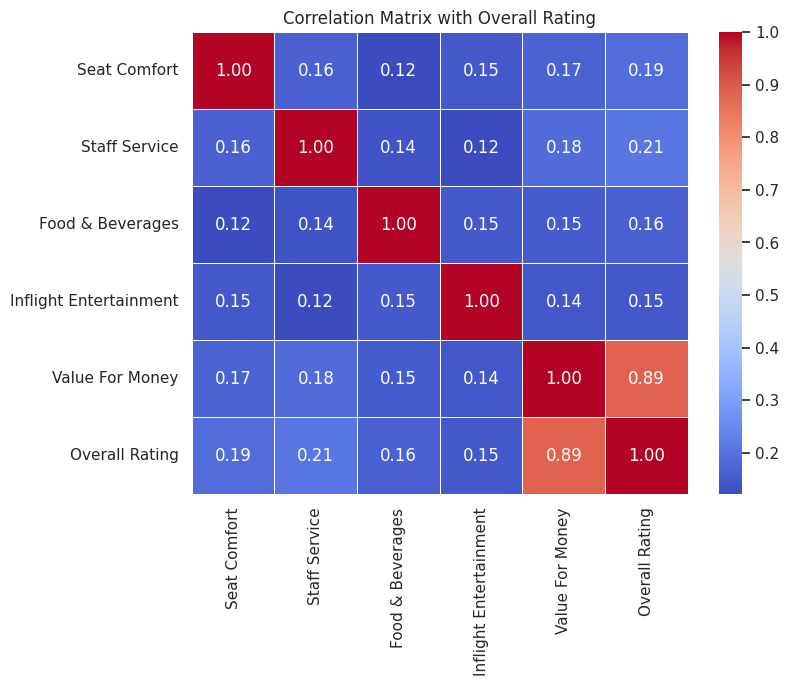

In [ ]:
#What factors (Seat Comfort, Staff Service, Food & Beverages, etc.) have the most significant impact on the overall rating of the passenger?

correlation_matrix = df[['Seat Comfort', 'Staff Service', 'Food & Beverages',
                         'Inflight Entertainment', 'Value For Money', 'Overall Rating']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix with Overall Rating')
plt.show()

Type of Traveller
Business          2.868583
Couple Leisure    2.920245
Family Leisure    2.651728
Solo Leisure      3.127702
Name: Overall Rating, dtype: float64


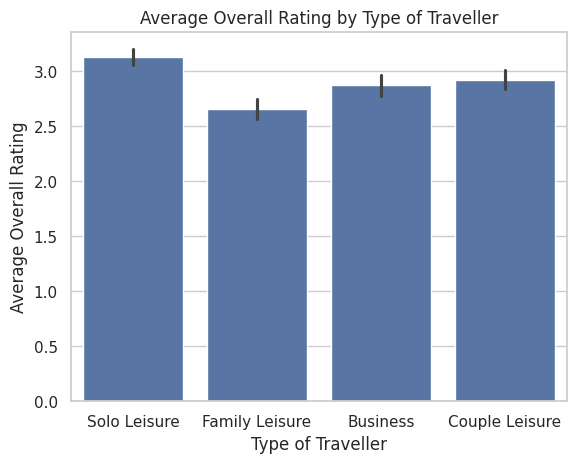

In [ ]:
type_ratings = df.groupby('Type of Traveller')['Overall Rating'].mean()
print(type_ratings)

sns.barplot(x='Type of Traveller', y='Overall Rating', data=df, estimator='mean')

plt.title('Average Overall Rating by Type of Traveller')
plt.xlabel('Type of Traveller')
plt.ylabel('Average Overall Rating')

plt.show()


In [ ]:
groups = [group["Overall Rating"].values for _, group in df.groupby("Airline")]
f_stat, p_value = stats.f_oneway(*groups)

print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value}")

# Interpret Results
if p_value < 0.05:
    print("There are significant differences in overall ratings between airlines (reject H0).")
else:
    print("There are no significant differences in overall ratings between airlines (fail to reject H0).")

F-statistic: 187.69
P-value: 4.272953032511568e-185
There are significant differences in overall ratings between airlines (reject H0).


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_results = pairwise_tukeyhsd(df['Overall Rating'], df['Airline'])

print(tukey_results)

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
        group1                 group2         meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------------
            Air France Cathay Pacific Airways   0.6376    0.0  0.3959  0.8794   True
            Air France               Emirates   -0.064 0.9564 -0.2767  0.1488  False
            Air France          Qatar Airways   1.0702    0.0  0.8674   1.273   True
            Air France     Singapore Airlines    0.838    0.0  0.6124  1.0636   True
            Air France       Turkish Airlines  -0.4638    0.0 -0.6676 -0.2599   True
Cathay Pacific Airways               Emirates  -0.7016    0.0 -0.9199 -0.4832   True
Cathay Pacific Airways          Qatar Airways   0.4326    0.0  0.2239  0.6413   True
Cathay Pacific Airways     Singapore Airlines   0.2004 0.1322 -0.0306  0.4313  False
Cathay Pacific Airways       Turkish Airlines  -1.1014    0.0 -1.

<ipython-input-52-ef8f8e2ff790>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Airline", y="Overall Rating", data=df, palette="Set3")


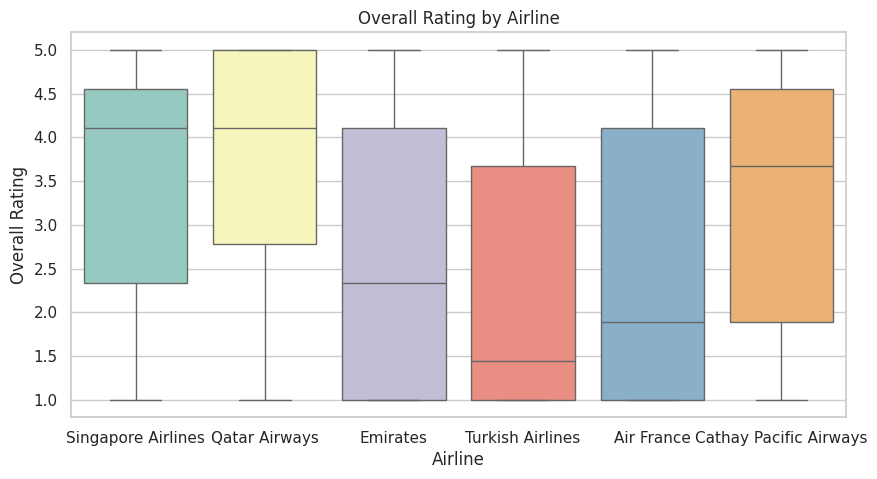

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Airline", y="Overall Rating", data=df, palette="Set3")
plt.title("Overall Rating by Airline")
plt.xlabel("Airline")
plt.ylabel("Overall Rating")
plt.show()

**Prediction Models**

MAE: 0.62
MSE: 0.82
R²: 0.67


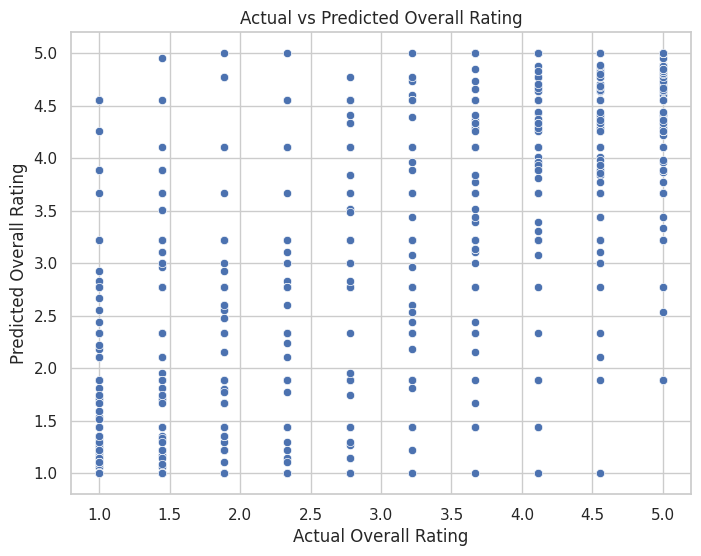

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

X = df[['Seat Comfort', 'Staff Service', 'Food & Beverages',
        'Inflight Entertainment', 'Value For Money']]
y = df['Overall Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=predictions)
plt.title('Actual vs Predicted Overall Rating')
plt.xlabel('Actual Overall Rating')
plt.ylabel('Predicted Overall Rating')
plt.show()

MAE: 0.50
MSE: 0.49
R²: 0.80


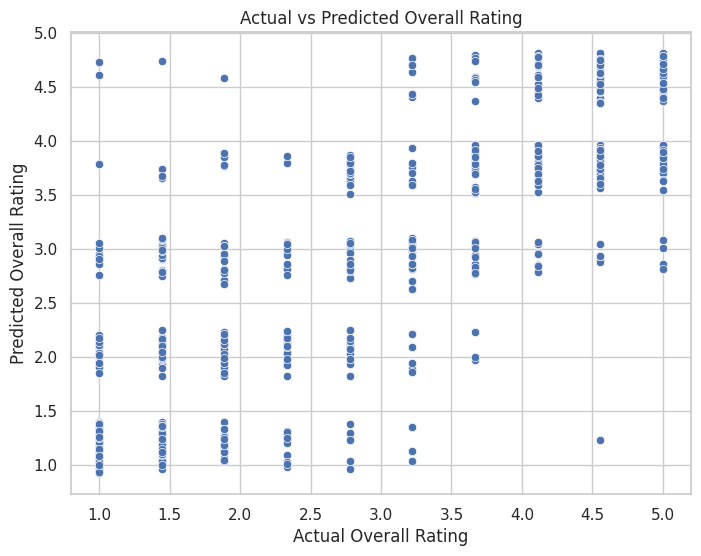

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=predictions)
plt.title('Actual vs Predicted Overall Rating')
plt.xlabel('Actual Overall Rating')
plt.ylabel('Predicted Overall Rating')
plt.show()

MAE: 0.47
MSE: 0.49
R²: 0.80


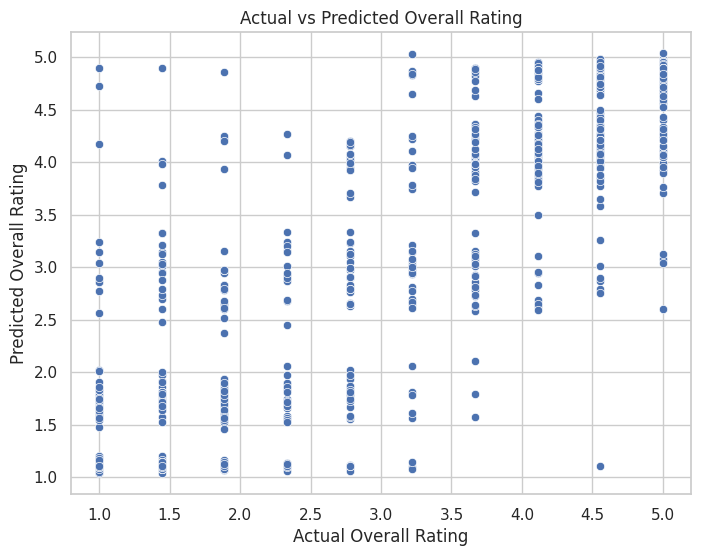

In [ ]:
from sklearn.svm import SVR

model = SVR()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=predictions)
plt.title('Actual vs Predicted Overall Rating')
plt.xlabel('Actual Overall Rating')
plt.ylabel('Predicted Overall Rating')
plt.show()

MAE: 0.50
MSE: 0.47
R²: 0.81


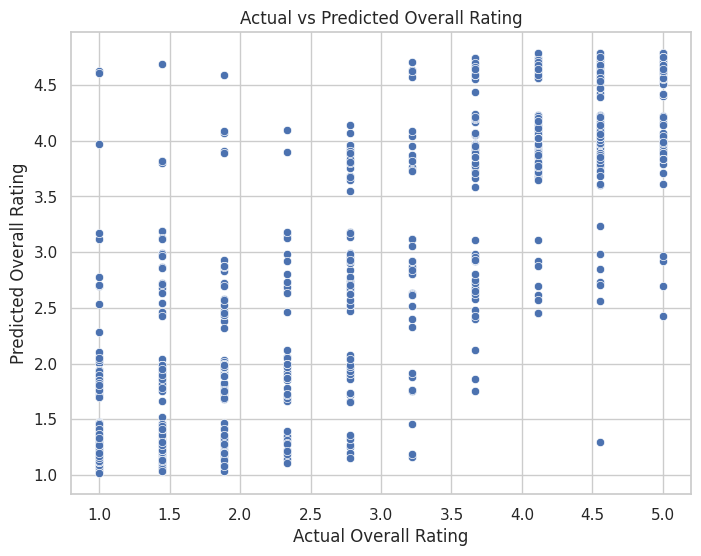

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=predictions)
plt.title('Actual vs Predicted Overall Rating')
plt.xlabel('Actual Overall Rating')
plt.ylabel('Predicted Overall Rating')
plt.show()